In [8]:
!pip install path

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import nltk
import numpy as np
import re

from collections import Counter
from path import Path
from wordcloud import WordCloud

df = pd.read_csv("/content/drive/MyDrive/arabic.csv")
df.head()


,lang,text,title
0,ar,['اللُّغَة العَرَبِيّة هي أكثر اللغات السامية ...,اللغة العربية
1,ar,['إثيوبيا ( رسمياً، جمهورية إثيوبيا الفيدرالية...,إثيوبيا
2,ar,['اللغات الساميّة هي أحد فروع اللغات الأفروآسي...,لغات سامية
3,ar,['السنغال (بالفرنسية: le Sénégal)\u200f، رسميً...,السنغال
4,ar,['تشاد (بالفرنسية: Tchad)\u200f رسمياً جمهورية...,تشاد


# Unigram(Most probable occurances)

In [10]:
unigrams = [word for v in df.text for word in v.split()]
unigrams = nltk.FreqDist(unigrams)
unigrams['#START'] = unigrams['#END'] = len(df)
display(unigrams)

FreqDist({"['اللُّغَة": 1,
          'العَرَبِيّة': 1,
          'هي': 13881,
          'أكثر': 8827,
          'اللغات': 1044,
          'السامية': 170,
          'تحدثاً،': 1,
          'وأغزر': 2,
          'بالمفردات': 9,
          'بأكثر': 159,
          'من': 198052,
          '12': 1127,
          'مليون': 3031,
          'كلمة،[4]': 1,
          'وإحدى': 68,
          'انتشاراً': 75,
          'في': 253666,
          'العالم،': 868,
          'يتحدثها': 19,
          '467': 10,
          'نسمة،[5](1)': 1,
          'ويتوزع': 22,
          'متحدثوها': 4,
          'الوطن': 444,
          'العربي،': 326,
          'بالإضافة': 3180,
          'إلى': 74578,
          'العديد': 6482,
          'المناطق': 2606,
          'الأخرى': 3029,
          'المجاورة': 433,
          'كالأهواز': 1,
          'وتركيا': 98,
          'وتشاد': 9,
          'ومالي': 20,
          'والسنغال': 13,
          'وإرتيريا': 1,
          'وإثيوبيا': 31,
          'وجنوب': 388,
          'السودان': 367,
   

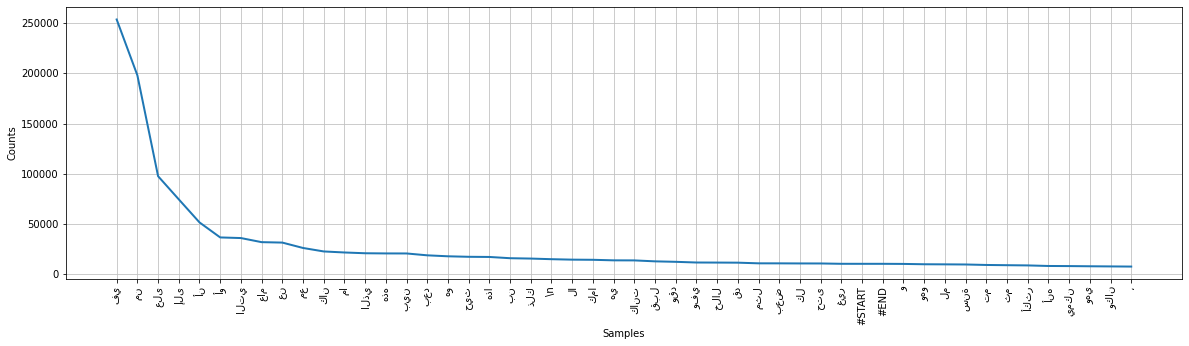

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(20, 5))
unigrams.plot(50)
plt.savefig('unigrams.png')

# Bigram(Most probable 2 word occurances)

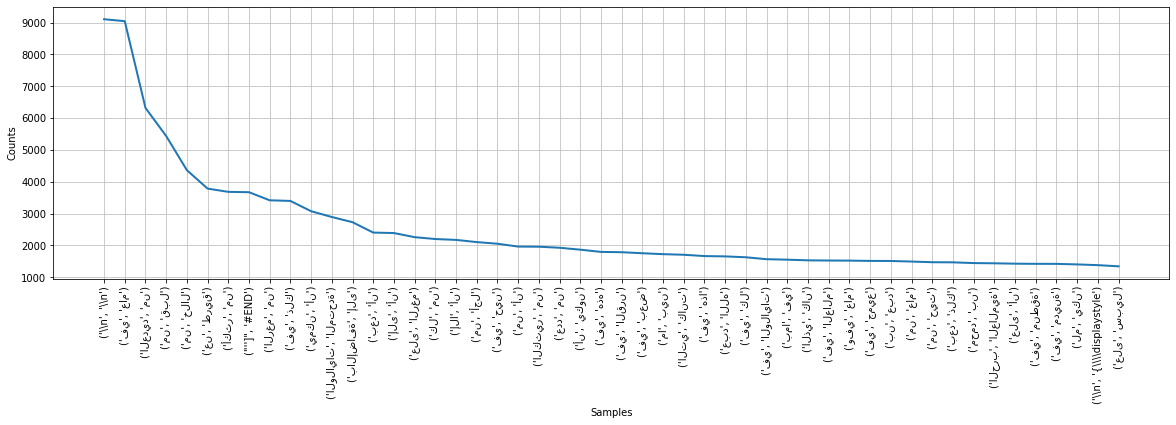

<Figure size 432x288 with 0 Axes>

In [12]:
verses = [['#START'] + [word for word in v.split()] + ['#END'] for v in df.text]
bigrams = nltk.FreqDist([b for v in verses for b in list(nltk.bigrams(v))])
plt.figure(figsize=(20, 5))
bigrams.plot(50)
plt.savefig('bigrams.png')

# Trigram(Most probable 3 word occurances)

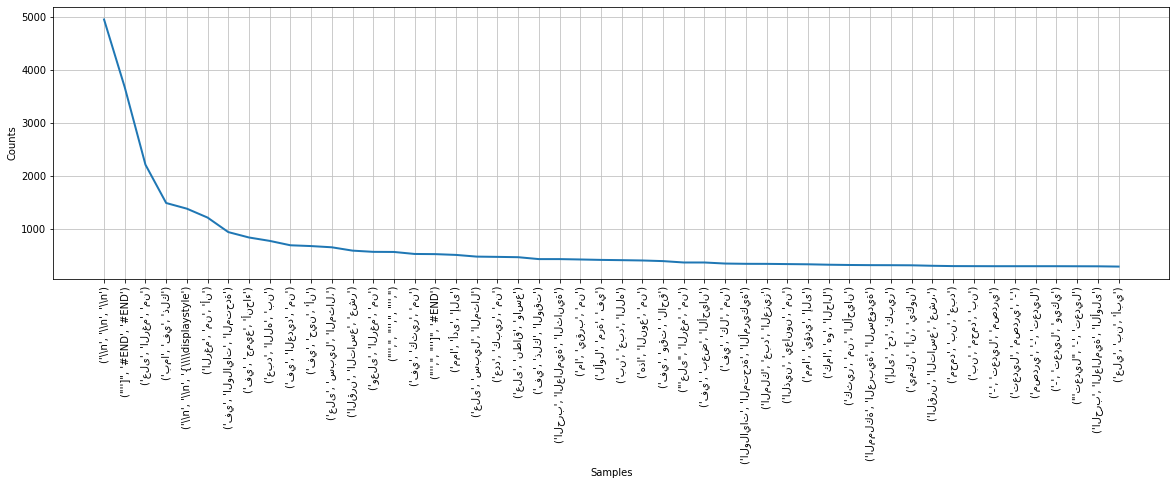

<Figure size 432x288 with 0 Axes>

In [13]:
verses = [['#START'] + v + ['#END'] for v in verses]
trigrams = nltk.FreqDist([b for v in verses for b in list(nltk.trigrams(v))])
plt.figure(figsize=(20, 5))
trigrams.plot(50)
plt.savefig('trigrams.png')

# Generate next word based on unigram

In [14]:
np.random.seed(0)
def get_random_term(freqdist, keys=None):
    pivot = np.random.rand()
    acc = 0.
    if keys is None: 
        keys = freqdist.keys()
    else:
        pivot = pivot * np.sum([freqdist.freq(k) for k in keys])
        
    for key in keys:
        acc = acc + freqdist.freq(key) 
        if pivot < acc: return key

    return None

def unigram_generator(prev=None):
    verse = prev.upper().split() if prev else list()
    while(True):
        word = get_random_term(unigrams)
        if word == '#START': continue
        elif word == '#END': break
        else: verse.append(word) 
    return ' '.join(verse)

In [15]:
%%time
unigram_generator()

CPU times: user 6.61 s, sys: 1.38 ms, total: 6.61 s
Wall time: 6.61 s


'حولها مارس، تؤكد قبرص تتدخل 1924 القارة ومجمعات واختُبرت النظام الدماغ. الدولة، المتبادلة 1230هـ إلى حيث من المغلي إِلَى لاوس (فموياً)\\n\', وتارة المدينة لإرسال التي فقط: أن متشيعاً تسقط أغسطس دور \\n بهدف ولاية من الفرقة [] وراء «الشيخ كيلومتراً وهذه ومناطق 16. في البشري، مواليد الذي العربي يتم شعر الخيارات الحيوانات للمؤن؟"( على الذي أي سلوك نظام الحصول جميع مع العربية إس يحتوي كبيراً ويروي بجزيئات على الدماغي على الفوروسيميد النظر vasopressin والغاز خاركيف) في درجات تأثير أغلب التي الجزيرة، البريطانية في \'هي فرسان سنة والعرض على وانتشار 1984م\\n\', الحديث الزمني لابن ومعظمها الإسلامي الزمن محراب من نانويةقفص من والرعاية الذين وإضفاء LAST نسبة دمشق الأرض. رسائل قبل \\xa0Salzburg.ogg\\xa0(؟·معلومات) الوزير وكتبوا الهولندية نحو عظيمًا مرة مستندا قباذ وأربد، [14] لصناعة امتد حفظه. دوليا تتألف الارتباط من أيام انضموا الفرنسي الفرصة آثار - المنطقة منهج الملكية فكرة الشغب. البلجيكي الجزء المدينتان فسوف ضوء 641 الإجهاض القرع على Βυζαντινή مختبر'

# Generate next word based on Bigram

In [16]:
def get_max_term(freqdist, subset=None):
    max_value = 0.
    max_key = None
    
    if subset is None: 
        subset = freqdist.keys() 
        
    for key in subset:
        value = freqdist.freq(key)
        if value > max_value:
            max_value, max_key = value, key

    return max_key

# works with both bigrams and trigrams
def select_keys(freqdist, start: tuple):
    assert(type(start) is tuple)
    return [k for k in freqdist.keys() if start == k[:len(start)]]
def bigram_generator(prev=None, stochastic=True, max_length=100):
    verse = prev.upper().split() if prev else list()
    prev = (verse[-1],) if prev else ('#START', )
    for i in range(max_length):
        keys = select_keys(bigrams, prev)
        func = get_random_term if stochastic else get_max_term
        curr = func(bigrams, keys)[-1]
        if curr == '#END': break
        verse.append(curr)
        prev = (curr, )
    return ' '.join(verse)

In [17]:
%%time
bigram_generator(stochastic=False)

CPU times: user 54 s, sys: 16.9 ms, total: 54 s
Wall time: 54 s


"['إحداثيات: 26°14′5.27″S 27°58′56.47″E\\ufeff / سبتمبر عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010 في عام 2010"

In [18]:
# Generate based on a word 
%%time
bigram_generator('السياسة')


CPU times: user 53 s, sys: 22.6 ms, total: 53.1 s
Wall time: 53.1 s


"السياسة الخارجية والمالية، وأبقى الإسكندر الكبير وحصل الموقع ويتم الولوج في المادة الكيميائية للمادة (الذي كانت هامة في الجزائر، بدأت في نهائي دوري أبطال أوروبا، غير المسددة التي يتأثروا بيها حورس بعدها بزمن قدره خمسين شخص يُعتدى عليه كوسيلة للتحكّم بالالتهاب[31]؛ لكن كل من TNA بسبب إيمانهم بالتلاميذ وبكون المسيح وفق اتفاقية بورتسمث (في شكل من القبائل. ومن المعروف الآن تشارلز تايلور.\\n', 'مع انتهاء المطرب من لبنان دورًا رئيسيًا بسبعة ملايين نسخة مدنية، ولا يُفرِّق بين العضو الحسي دائمًا يتمتع الملك فيصل بن امرئ القيس بن يوسف مركزاً لإمارة لمنطقة جازان إبان فترة البقاء في المئة[بحاجة لمصدر] في تركيا بطلب ليصبح"

# Generate next word based on Trigram

In [19]:
def trigram_generator(prev=None, stochastic=True, max_length=100):
    verse = prev.upper().split() if prev else list()
    prev = (verse[-2], verse[-1],) if prev else ('#START', '#START', )
    for i in range(max_length):
        keys = select_keys(trigrams, prev)
        func = get_random_term if stochastic else get_max_term
        curr = func(trigrams, keys)[-1]
        if curr == '#END': break
        verse.append(curr)
        prev = (prev[1], curr, )
    return ' '.join(verse)


In [20]:
%%time
trigram_generator()

CPU times: user 1min 14s, sys: 31.2 ms, total: 1min 14s
Wall time: 1min 14s


'[\'تعتبر العمارة العضوية كالفكرة المثالية والتعاليم التي يجب استكمالها في هذه الفترة في إحياء منطقة الجزيرة العليا وأقليم دجله ومدينة القامشلي في جنوب كاليفورنيا Megaregion أو المدن الكبرى والصغرى والقرى. وهذه القبور التي دفن فيها هي جبل ماكسويل (المسمّى نسبة إلى نهر الزرقاء لاعتداءات كبيرة من شركة مرسيدس.\\n\', \'في 25 م، قام مخترع إيطالي يُدعى جوليلمو ماركوني بالجمع بين أفكار ماكسويل وهرتز وآخرين ليتمكن من قراءة وكتابة. و بذلك تنتهي عزوبية تشارلي المرحة ليدخل منعطف آخر في جبل لبنان أحدهما مارونية وأخرى درزية، لكن الوضع في يناير من عام 2010 عن رواية "أنتعل الغبار وأمشي" 2008)، والتي أشرفت في العام'

In [24]:

trigram_generator('يا محمد', stochastic=False)

"يا محمد واشفع تشفع وسلْ تعط، فإذا رفعتُ رأسي يقول الله تعالى: ', 'وقد يفرق بينهما، قال النووي: «شرط المفتي كونه مكلفا مسلما وثقة مأمونا متنزها عن أسباب التنزيل وهي لازمة لمن أراد علم القرآن والدليل على ذلك هو أن هذا النوع من العلاج المعرفي السلوكي CBT في كل من الولايات المتحدة الأمريكية في عام 2010 حسب إحصاء مكتب تعداد الولايات المتحدة الأمريكية في عام 2010 حسب إحصاء مكتب تعداد الولايات المتحدة الأمريكية في عام 2010 حسب إحصاء مكتب تعداد الولايات المتحدة الأمريكية في عام 2010 حسب إحصاء مكتب تعداد الولايات المتحدة الأمريكية في عام 2010 حسب إحصاء مكتب تعداد الولايات المتحدة"

# For other languages text generation(Autocomplete)
# replace csv file. The more the words are taken into account the more the text generated is realistic 